# Homework 2:  Bank Marketing
Zhuang Lin-Sheng (Jonathan) (1701212990)

### (1) Preparation

First, we need to download the dataset from internet with the "**_urllib_**" module if we don't have local dataset file, and extract the zip file that we have downloaded with the "**_zipfile_**" modual. Also, we need to load the local ".csv" file into python environment.

After doing that, I would like to choose '**_age_**'(numerical), '**_balance_**'(numerical), and '**_housing_**'(binary) as my predictors, and '**_y_**'(which means individuals' decisions of term deposit, binary) as the response variable. Then, we need to replace the characters in categorical variables with numbers. The rule of the replacement is as follow:

> **y** : binary variable. 1 for "yes" and -1 for "no".

> **age** : numerical variable.

> **balance** : numerical variable.

> **housing** : binary variable. 1 for "yes" and 0 for "no".

In [1]:
# Download the data from the internet if we don't have local dataset file.
# import urllib
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
# zip_file = "bank.zip"
# urllib.request.urlretrieve(url, zip_file)

import zipfile
azip = zipfile.ZipFile('bank.zip')
azip.extractall()

import pandas as pd
bank = pd.read_table('./bank.csv', sep = ';')

import numpy as np
y = bank.y.values
y = np.where(y == 'yes', 1, -1)
Xdf = pd.DataFrame()
Xdf['age'] = bank['age']
Xdf['balance'] = bank['balance']
Xdf['education'] = bank.education.replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0])
Xdf['housing'] = bank['housing'].replace(['yes', 'no'],[1, 0])
Xdf.head()

,age,balance,education,housing
0,30,1787,1,0
1,33,4789,2,1
2,35,1350,3,1
3,30,1476,3,1
4,59,0,2,1


Then, we need to split the data into training and test data-subsets. It would be easy to use "**_sklearn_**" modual which have been well developed by other engineers, and call the "**_train_\__test_\__split_**" method. 

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size = 0.3, random_state = 1)

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Before practicing machine learning algorithms, we'd better standardize the data. We would standardize the explanatory features "**_age_**" and "**_balance_**". It will be easy if we use "**_StandardScaler_**" method from "**_sklearn_**" modual.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train.iloc[:,[0,1]]) ## Just the two features are numerical variables.

X_train_std_partial = sc.transform(X_train.iloc[:,[0,1]])
X_test_std_partial = sc.transform(X_test.iloc[:,[0,1]])

X_train_std = np.hstack((X_train_std_partial, X_train.iloc[:,[2, 3]]))
X_test_std = np.hstack((X_test_std_partial, X_test.iloc[:,[2, 3]]))

X_std = np.hstack((np.vstack((X_train_std_partial, X_test_std_partial)), 
                   np.vstack((X_train, X_test))[:,[2, 3]]))

The variable "**_X_\__std_**" as well as "**_y_**" is a numpy.ndarray type. 

Lastly, we will write a function to plot the results of different ML algorithms:

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### (2) Linear Perceptron

Now, we are able to overview the sub dataset that we are interested in through a scatter figure. We can try to use a linear perceptron algorithsm to try to classify "**_y_**" with the two numerical variables "**_age_**" and "**_balance_**":

Accuracy:  0.868828297715549


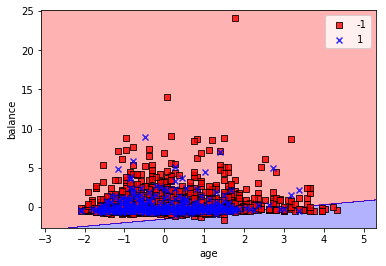

In [5]:
from sklearn.linear_model import Perceptron
index = [0, 1]

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, tol=0.000001)
ppn.fit(X_train_std[:, [0,1]], y_train)

y_pred_ppn = ppn.predict(X_test_std[:, index])
print('Accuracy: ', ((y_test == y_pred_ppn).sum())/len(y_test))

plot_decision_regions(X = X_std[:, index], y = y, classifier = ppn)
plt.xlabel("age")
plt.ylabel("balance")
plt.legend(loc = 'upper right')
plt.show()

It is clear that the result is not quite good from the figure, and much points are mis-classified. The accuracy is around 86% accourding to the statics. 

### (3) Logistic Regression

First, we apply logistic regression method to the dataset:

Accuracy:  0.871039056742815


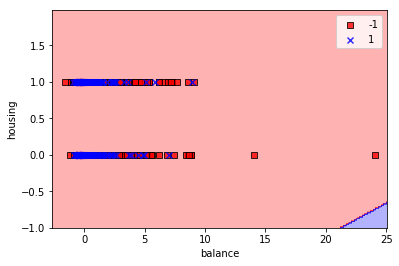

In [6]:
from sklearn.linear_model import LogisticRegression
index = [1, 3]

lr = LogisticRegression(C = 1, random_state = 0)
lr.fit(X_train_std[:,index], y_train) 

y_pred_lr = lr.predict(X_test_std[:,index])
print('Accuracy: ', (y_test == y_pred_lr).sum()/len(y_test))

plot_decision_regions(X = X_std[:, index], y = y, classifier = lr)
plt.xlabel("balance")
plt.ylabel("housing")
plt.legend(loc = 'upper right')
plt.show()

The accuracy of the prediction is around 88%. This is similar to linear perceptron algorithsm with "age" and "balance" as the predictor, which is not good. It is easy to see that the result is not quite well from the figure, because the two different groups of individuals are highly crossed, and this make our result quite wired. 

### (4) SVM with RBF Kernel

Accuracy:  0.871039056742815


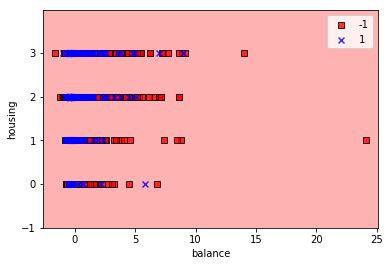

In [7]:
from sklearn.svm import SVC
index = [1, 2]

svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.10, C = 10)
svm.fit(X_train_std[:,index], y_train)

y_pred_svm = svm.predict(X_test_std[:,index])
print('Accuracy: ', (y_test == y_pred_svm).sum()/len(y_test))

plot_decision_regions(X = X_std[:, index], y = y, classifier = svm)
plt.xlabel("balance")
plt.ylabel("housing")
plt.legend(loc = 'upper right')
plt.show()

It is insteresting that the SVM method get the exactly same result as Logistic regression method. However, SVM method takes much more time than Logistic regression method.

### (5) Random Forests

Now we apply the Random Forest algorithsm to see whether the prediction performance would be better.

Accuracy:  0.8135593220338984


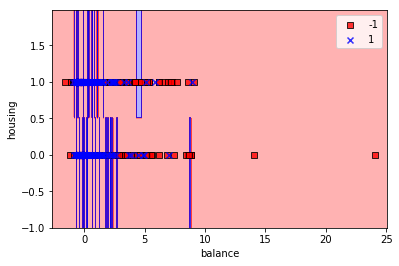

In [11]:
from sklearn.ensemble import RandomForestClassifier
index = [1, 3]

forest = RandomForestClassifier(criterion = 'entropy',
                                n_estimators = 30,
                                random_state = 10,
                                n_jobs = 2)
forest.fit(X_train_std[:,index], y_train)

y_pred = forest.predict(X_test_std[:,index])
print('Accuracy: ', (y_test == y_pred).sum()/len(y_pred))

plot_decision_regions(X = X_std[:, index], y = y, classifier = forest)
plt.xlabel("balance")
plt.ylabel("housing")
plt.legend(loc = 'upper right')
plt.show()

It is obviously that Ramdom Forest algorithsm is not as good as the previous several methods.

### (6) Further Prediction Porformance Comparision

In [14]:
bank_full = pd.read_table('./bank-full.csv', sep = ';')
y2 = bank_full.y.values
y2 = np.where(y2 == 'yes', 1, -1)
Xdf2 = pd.DataFrame()
Xdf2['age'] = bank_full['age']
Xdf2['balance'] = bank_full['balance']
Xdf2['education'] = bank_full.education.replace(['primary', 'secondary', 
                                                 'tertiary', 'unknown'], [1, 2, 3, 0])
Xdf2['default'] = bank_full['default'].replace(['yes', 'no'],[1, 0])
Xdf2['housing'] = bank_full['housing'].replace(['yes', 'no'],[1, 0])
Xdf2['loan'] = bank_full['loan'].replace(['yes', 'no'], [1, 0])

X_test_std_partial2 = sc.transform(Xdf2.loc[:,['age','balance']])
X_test_std2 = np.hstack((X_test_std_partial2, Xdf2.iloc[:,[2, 3, 4, 5]]))

index = [0, 1]
y_pred_ppn_2 = ppn.predict(X_test_std2[:, index])
print('Accuracy (Linear Perceptron): \t', (y_pred_ppn_2 == y2).sum()/len(y2))

index = [1, 3]
y_pred_lr_2 = lr.predict(X_test_std2[:,index])
print('Accuracy (Logistic Regression): ' , (y_pred_lr_2 == y2).sum()/len(y2))

index = [1, 2]
y_pred_svm_2 = svm.predict(X_test_std2[:,index])
print('Accuracy (SVM RBF kernel): \t', (y_pred_svm_2 == y2).sum()/len(y2))

index = [1, 3]
y_pred_forest_2 = forest.predict(X_test_std2[:, index])
print('Accuracy (Random Forest): \t', (y_pred_forest_2 == y2).sum()/len(y2))

Accuracy (Linear Perceptron): 	 0.8811130034726062
Accuracy (Logistic Regression):  0.8829709583950809
Accuracy (SVM RBF kernel): 	 0.8830151954170445
Accuracy (Random Forest): 	 0.8041627037667824


From this test, I find that Logistic regression would get the best result compared with ramdom forest or linear perceptron. 